In [2]:

extract_path = "'/Users/vipulsharma/Desktop/FL Project/Data 2'"


In [3]:
import os

# Path to your extracted data
base_dir = "/Users/vipulsharma/Desktop/FL Project/Data 2"

# Define valid image extensions (to ignore stray files)
valid_exts = ('.jpg', '.jpeg', '.png', '.nii', '.gz')

# Count images in each subfolder
for folder in sorted(os.listdir(base_dir)):
    folder_path = os.path.join(base_dir, folder)
    if os.path.isdir(folder_path):
        count = sum(
            1 for file in os.listdir(folder_path)
            if file.lower().endswith(valid_exts)
        )
        print(f"{folder}: {count} images")


Mild Dementia: 5002 images
Moderate Dementia: 488 images
Non Demented: 67222 images
Very mild Dementia: 13725 images


In [4]:
import os
import pandas as pd

# Path to your dataset
# Updated to your local Mac path
base_dir = "/Users/vipulsharma/Desktop/FL Project/Data 2"

# Supported image extensions
valid_exts = ('.jpg', '.jpeg', '.png', '.tif', '.tiff')

data_records = []

# Walk through folders
print(f"Searching for images in: {base_dir}")
for root, dirs, files in os.walk(base_dir):
    for file in files:
        if file.lower().endswith(valid_exts):
            label = os.path.basename(root)  # Folder name = label
            file_path = os.path.join(root, file)
            data_records.append((file_path, label))

print(f"Found {len(data_records)} images.")

# Create a DataFrame
df = pd.DataFrame(data_records, columns=["image_path", "label"])

# After creating df (DataFrame of all images)
df_small = (
    df.groupby("label", group_keys=False)
      .apply(lambda x: x.sample(frac=0.1, random_state=42))  # take 10% from each class
      .reset_index(drop=True)
)




# Save CSV to local folder
# Updated to your local Mac path
manifest_path = "/Users/vipulsharma/Desktop/FL Project/manifest.csv"
df.to_csv(manifest_path, index=False)

print("✅ Manifest created successfully!")
print(f"📸 Total images found: {len(df)}")
print(f"💾 Saved to: {manifest_path}")
print("\nSample rows:")
print(df.head())

Searching for images in: /Users/vipulsharma/Desktop/FL Project/Data 2
Found 86437 images.
✅ Manifest created successfully!
📸 Total images found: 86437
💾 Saved to: /Users/vipulsharma/Desktop/FL Project/manifest.csv

Sample rows:
                                          image_path          label
0  /Users/vipulsharma/Desktop/FL Project/Data 2/M...  Mild Dementia
1  /Users/vipulsharma/Desktop/FL Project/Data 2/M...  Mild Dementia
2  /Users/vipulsharma/Desktop/FL Project/Data 2/M...  Mild Dementia
3  /Users/vipulsharma/Desktop/FL Project/Data 2/M...  Mild Dementia
4  /Users/vipulsharma/Desktop/FL Project/Data 2/M...  Mild Dementia


/var/folders/vw/991dywvn6dq0jw3g20bjqwr80000gn/T/ipykernel_3969/313998982.py:30: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(frac=0.1, random_state=42))  # take 10% from each class


(ClientAppActor pid=4030) /Users/vipulsharma/miniconda3/lib/python3.13/multiprocessing/resource_tracker.py:301: UserWarning: resource_tracker: There appear to be 1 leaked semaphore objects to clean up at shutdown: {'/mp-vtxirey5'}
(ClientAppActor pid=4030)   warnings.warn(
(ClientAppActor pid=4033) /Users/vipulsharma/miniconda3/lib/python3.13/multiprocessing/resource_tracker.py:301: UserWarning: resource_tracker: There appear to be 1 leaked semaphore objects to clean up at shutdown: {'/mp-kqorbdjt'}


✅ Total images: 86437

📊 Images per class:
label
Non Demented          67222
Very mild Dementia    13725
Mild Dementia          5002
Moderate Dementia       488
Name: count, dtype: int64


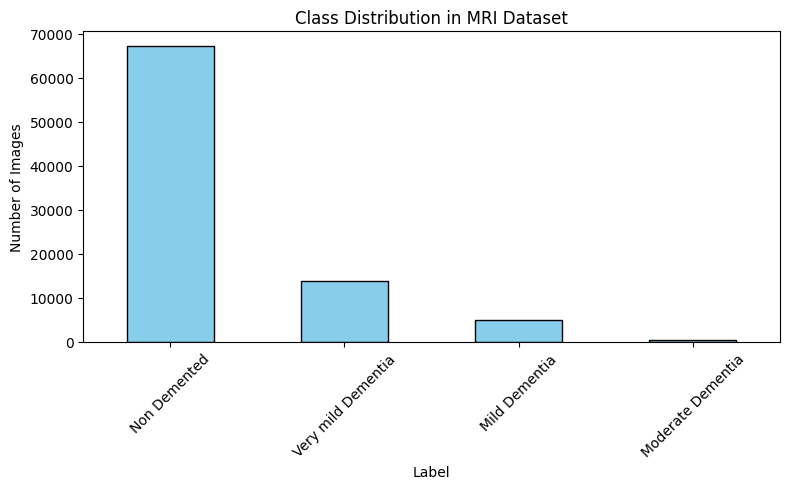

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the manifest
# Updated to your local Mac path
manifest_path = "/Users/vipulsharma/Desktop/FL Project/manifest.csv"

df = pd.read_csv(manifest_path)

# Check total images
print(f"✅ Total images: {len(df)}\n")

# Check number of images per class
print("📊 Images per class:")
print(df['label'].value_counts())

# Plot class distribution
plt.figure(figsize=(8, 5))
df['label'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Class Distribution in MRI Dataset")
plt.xlabel("Label")
plt.ylabel("Number of Images")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import KFold  # <-- CHANGED: Import KFold
import os

# Path to your manifest file (using the 10% subset)
# Make sure this points to 'manifest_small.csv' to keep the workload light
manifest_path = "/Users/vipulsharma/Desktop/FL Project/manifest.csv"

# Read the manifest
df = pd.read_csv(manifest_path)

# Number of clients
num_clients = 10

# Output directory for client splits
output_dir = "/Users/vipulsharma/Desktop/FL Project/client_splits"
os.makedirs(output_dir, exist_ok=True)

# Create random folds using KFold
# <-- CHANGED: Replaced StratifiedKFold with KFold
kf = KFold(n_splits=num_clients, shuffle=True, random_state=42)

# <-- CHANGED: The loop no longer needs df['label']
for i, (_, test_idx) in enumerate(kf.split(df)):
    client_df = df.iloc[test_idx]
    client_path = os.path.join(output_dir, f"client_{i+1}.csv")
    client_df.to_csv(client_path, index=False)
    print(f"✅ Saved: {client_path} | Samples: {len(client_df)}")

print("\n🎉 Data successfully split into 10 RANDOM clients!")

✅ Saved: /Users/vipulsharma/Desktop/FL Project/client_splits/client_1.csv | Samples: 8644
✅ Saved: /Users/vipulsharma/Desktop/FL Project/client_splits/client_2.csv | Samples: 8644
✅ Saved: /Users/vipulsharma/Desktop/FL Project/client_splits/client_3.csv | Samples: 8644
✅ Saved: /Users/vipulsharma/Desktop/FL Project/client_splits/client_4.csv | Samples: 8644
✅ Saved: /Users/vipulsharma/Desktop/FL Project/client_splits/client_5.csv | Samples: 8644
✅ Saved: /Users/vipulsharma/Desktop/FL Project/client_splits/client_6.csv | Samples: 8644
✅ Saved: /Users/vipulsharma/Desktop/FL Project/client_splits/client_7.csv | Samples: 8644
✅ Saved: /Users/vipulsharma/Desktop/FL Project/client_splits/client_8.csv | Samples: 8643
✅ Saved: /Users/vipulsharma/Desktop/FL Project/client_splits/client_9.csv | Samples: 8643
✅ Saved: /Users/vipulsharma/Desktop/FL Project/client_splits/client_10.csv | Samples: 8643

🎉 Data successfully split into 10 stratified clients!


In [7]:
import pandas as pd
import os

# Updated to your local Mac path
split_dir = "/Users/vipulsharma/Desktop/FL Project/client_splits"

# Go through each client CSV and print class distribution
for file in sorted(os.listdir(split_dir)):
    if file.endswith(".csv"):
        client_df = pd.read_csv(os.path.join(split_dir, file))
        print(f"\n📁 {file}")
        print(client_df['label'].value_counts())


📁 client_1.csv
label
Non Demented          6722
Very mild Dementia    1372
Mild Dementia          501
Moderate Dementia       49
Name: count, dtype: int64

📁 client_10.csv
label
Non Demented          6722
Very mild Dementia    1372
Mild Dementia          500
Moderate Dementia       49
Name: count, dtype: int64

📁 client_2.csv
label
Non Demented          6722
Very mild Dementia    1372
Mild Dementia          501
Moderate Dementia       49
Name: count, dtype: int64

📁 client_3.csv
label
Non Demented          6722
Very mild Dementia    1373
Mild Dementia          500
Moderate Dementia       49
Name: count, dtype: int64

📁 client_4.csv
label
Non Demented          6722
Very mild Dementia    1373
Mild Dementia          500
Moderate Dementia       49
Name: count, dtype: int64

📁 client_5.csv
label
Non Demented          6722
Very mild Dementia    1373
Mild Dementia          500
Moderate Dementia       49
Name: count, dtype: int64

📁 client_6.csv
label
Non Demented          6723
Very mild Deme

In [8]:
# Step 1: Imports
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import pandas as pd

# Step 2: Define a common preprocessing transform
# (This will be identical for every client)
common_transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),     # ensure grayscale
    transforms.Resize((224, 224)),                   # resize to 224x224
    transforms.ToTensor(),                           # convert to tensor [0,1]
    transforms.Normalize(mean=[0.5], std=[0.5])      # normalize to [-1,1]
])

print("✅ Libraries imported and transform ready for all clients.")


✅ Libraries imported and transform ready for all clients.


In [9]:
# Step 3: Define custom dataset for each client
class MRIDataset(Dataset):
    def __init__(self, csv_path, transform=None):
        self.data = pd.read_csv(csv_path)
        self.transform = transform

        # Create a label mapping so each class becomes a number
        self.label_map = {
            "Non Demented": 0,
            "Very mild Dementia": 1,
            "Mild Dementia": 2,
            "Moderate Dementia": 3
        }

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img_path = self.data.iloc[idx, 0]
        label_name = self.data.iloc[idx, 1]
        label = self.label_map[label_name]

        # Open image in grayscale mode
        image = Image.open(img_path).convert("L")

        # Apply transform (resize, normalize, etc.)
        if self.transform:
            image = self.transform(image)

        return image, label


In [10]:
# Step 4: Create DataLoaders for all clients

import glob

# Path where client CSVs are stored
# Updated to your local Mac path
client_csv_dir = "/Users/vipulsharma/Desktop/FL Project/client_splits"

# Load all CSVs
client_csvs = sorted(glob.glob(client_csv_dir + "/*.csv"))

client_loaders = {}
batch_size = 32  # you can adjust based on your GPU/CPU

for i, csv_path in enumerate(client_csvs, start=1):
    dataset = MRIDataset(csv_path, transform=common_transform)
    loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
    client_loaders[f"client_{i}"] = loader
    print(f"✅ Loaded client_{i} | Samples: {len(dataset)}")

print("\nAll client DataLoaders are ready and preprocessed consistently! 🚀")

✅ Loaded client_1 | Samples: 8644
✅ Loaded client_2 | Samples: 8643
✅ Loaded client_3 | Samples: 8644
✅ Loaded client_4 | Samples: 8644
✅ Loaded client_5 | Samples: 8644
✅ Loaded client_6 | Samples: 8644
✅ Loaded client_7 | Samples: 8644
✅ Loaded client_8 | Samples: 8644
✅ Loaded client_9 | Samples: 8643
✅ Loaded client_10 | Samples: 8643

All client DataLoaders are ready and preprocessed consistently! 🚀


In [11]:
"""import torch
import torch.nn as nn
import torch.nn.functional as F

class MRI_CNN(nn.Module):
    def __init__(self, num_classes=4):
        super(MRI_CNN, self).__init__()

        # Block 1: Basic Feature Extraction
        self.block1 = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        # Block 2: Intermediate Features
        self.block2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        # Block 3: High-level Semantic Features
        self.block3 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.Dropout(0.3),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        # Block 4: Deep Representation
        self.block4 = nn.Sequential(
            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.Dropout(0.4)
        )

        # Global Average Pooling
        self.global_avg_pool = nn.AdaptiveAvgPool2d((1, 1))

        # Classification Head
        self.classifier = nn.Sequential(
            nn.Linear(256, 128),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(128, num_classes)
        )

    def forward(self, x):
        x = self.block1(x)
        x = self.block2(x)
        x = self.block3(x)
        x = self.block4(x)
        x = self.global_avg_pool(x)
        x = x.view(x.size(0), -1)  # flatten
        x = self.classifier(x)
        return F.log_softmax(x, dim=1)
        """


'import torch\nimport torch.nn as nn\nimport torch.nn.functional as F\n\nclass MRI_CNN(nn.Module):\n    def __init__(self, num_classes=4):\n        super(MRI_CNN, self).__init__()\n\n        # Block 1: Basic Feature Extraction\n        self.block1 = nn.Sequential(\n            nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1),\n            nn.BatchNorm2d(32),\n            nn.ReLU(inplace=True),\n            nn.MaxPool2d(kernel_size=2, stride=2)\n        )\n\n        # Block 2: Intermediate Features\n        self.block2 = nn.Sequential(\n            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),\n            nn.BatchNorm2d(64),\n            nn.ReLU(inplace=True),\n            nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1),\n            nn.BatchNorm2d(64),\n            nn.ReLU(inplace=True),\n            nn.MaxPool2d(kernel_size=2, stride=2)\n        )\n\n        # Block 3: High-level Semantic Features\n        self.block3 = nn.Sequential(\n            nn.Conv2d(64, 128

In [12]:
from sklearn.model_selection import train_test_split
import pandas as pd
import os

# Base directory where your client CSVs are stored
# FIXED: Added the leading '/' to make it an absolute path
base_dir = "/Users/vipulsharma/Desktop/FL Project/client_splits"

# Create new folder for split files
split_dir = os.path.join(base_dir, "splits")
os.makedirs(split_dir, exist_ok=True)

# Split ratios
train_ratio = 0.7
val_ratio = 0.15
test_ratio = 0.15

# Loop over all 10 clients
for client_id in range(1, 11):
    client_path = os.path.join(base_dir, f"client_{client_id}.csv")
    df = pd.read_csv(client_path)

    # First split: Train vs temp (val+test)
    train_df, temp_df = train_test_split(
        df,
        test_size=(1 - train_ratio),
        stratify=df["label"],
        random_state=4_2
    )

    # Second split: Validation vs Test
    try:
        # Attempt stratified split
        val_df, test_df = train_test_split(
            temp_df,
            test_size=(test_ratio / (test_ratio + val_ratio)),
            stratify=temp_df["label"],
            random_state=42
        )
        print(f"✅ Client {client_id}: Stratified split successful.")
    except ValueError as e:
        # Fallback to non-stratified split if stratification fails
        print(f"⚠️ Client {client_id}: Stratified split failed due to small class size ({e}). Falling back to non-stratified split for val/test.")
        val_df, test_df = train_test_split(
            temp_df,
            test_size=(test_ratio / (test_ratio + val_ratio)),
            random_state=42
        )


    # Save all three splits
    train_path = os.path.join(split_dir, f"client_{client_id}_train.csv")
    val_path = os.path.join(split_dir, f"client_{client_id}_val.csv")
    test_path = os.path.join(split_dir, f"client_{client_id}_test.csv")

    train_df.to_csv(train_path, index=False)
    val_df.to_csv(val_path, index=False)
    test_df.to_csv(test_path, index=False)

    print(f"📊 Client {client_id} Split Sizes: Train={len(train_df)}, Val={len(val_df)}, Test={len(test_df)}")
    print(f"📁 Saved to: {split_dir}")


print("\n🎉 All clients successfully split into train/val/test sets!")

✅ Client 1: Stratified split successful.
📊 Client 1 Split Sizes: Train=6050, Val=1297, Test=1297
📁 Saved to: /Users/vipulsharma/Desktop/FL Project/client_splits/splits
✅ Client 2: Stratified split successful.
📊 Client 2 Split Sizes: Train=6050, Val=1297, Test=1297
📁 Saved to: /Users/vipulsharma/Desktop/FL Project/client_splits/splits
✅ Client 3: Stratified split successful.
📊 Client 3 Split Sizes: Train=6050, Val=1297, Test=1297
📁 Saved to: /Users/vipulsharma/Desktop/FL Project/client_splits/splits
✅ Client 4: Stratified split successful.
📊 Client 4 Split Sizes: Train=6050, Val=1297, Test=1297
📁 Saved to: /Users/vipulsharma/Desktop/FL Project/client_splits/splits
✅ Client 5: Stratified split successful.
📊 Client 5 Split Sizes: Train=6050, Val=1297, Test=1297
📁 Saved to: /Users/vipulsharma/Desktop/FL Project/client_splits/splits
✅ Client 6: Stratified split successful.
📊 Client 6 Split Sizes: Train=6050, Val=1297, Test=1297
📁 Saved to: /Users/vipulsharma/Desktop/FL Project/client_splits

In [ ]:
# ===== Imports =====
import flwr as fl
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import transforms
from tqdm import tqdm
import pandas as pd
from PIL import Image
from typing import List, Tuple, Dict, Union
from flwr.server.client_manager import SimpleClientManager
from flwr.server.server import Server


# ===== Device Setup =====
# Updated to auto-detect Mac's 'mps' GPU (if available) or fallback to CPU
if torch.backends.mps.is_available():
    device = torch.device("mps")
else:
    device = torch.device("cpu")
print("🚀 Using device:", device)

# ===== CNN Model =====
class MRI_CNN(nn.Module):
    def __init__(self, num_classes=4):
        super(MRI_CNN, self).__init__()
        self.block1 = nn.Sequential(
            nn.Conv2d(3, 32, 3, 1, 1), nn.BatchNorm2d(32), nn.ReLU(), nn.MaxPool2d(2)
        )
        self.block2 = nn.Sequential(
            nn.Conv2d(32, 64, 3, 1, 1), nn.BatchNorm2d(64), nn.ReLU(),
            nn.Conv2d(64, 64, 3, 1, 1), nn.BatchNorm2d(64), nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.block3 = nn.Sequential(
            nn.Conv2d(64, 128, 3, 1, 1), nn.BatchNorm2d(128), nn.ReLU(),
            nn.Conv2d(128, 128, 3, 1, 1), nn.BatchNorm2d(128), nn.ReLU(),
            nn.Dropout(0.3), nn.MaxPool2d(2)
        )
        self.block4 = nn.Sequential(
            nn.Conv2d(128, 256, 3, 1, 1), nn.BatchNorm2d(256), nn.ReLU(), nn.Dropout(0.4)
        )
        self.global_avg_pool = nn.AdaptiveAvgPool2d((1, 1))
        self.classifier = nn.Sequential(
            nn.Linear(256, 128), nn.ReLU(), nn.Dropout(0.5), nn.Linear(128, num_classes)
        )

    def forward(self, x):
        x = self.block1(x)
        x = self.block2(x)
        x = self.block3(x)
        x = self.block4(x)
        x = self.global_avg_pool(x)
        x = x.view(x.size(0), -1)
        return self.classifier(x)


# ===== Dataset Class =====
class MRIDataset(torch.utils.data.Dataset):
    def __init__(self, csv_path, transform=None):
        self.data = pd.read_csv(csv_path)
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img_path = self.data.iloc[idx, 0]
        label = self.data.iloc[idx, 1]
        image = Image.open(img_path).convert("RGB")
        if self.transform:
            image = self.transform(image)
        label_map = {
            "Non Demented": 0,
            "Very mild Dementia": 1,
            "Mild Dementia": 2,
            "Moderate Dementia": 3
        }
        return image, label_map[label]


# ===== Transform =====
# Using 128x128 to reduce heat
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5]*3, std=[0.5]*3)
])

# ===== Federated Client (Flower NumPyClient) =====
class MRIClient(fl.client.NumPyClient):
    def __init__(self, train_loader, val_loader, model):
        self.train_loader = train_loader
        self.val_loader = val_loader
        self.model = model.to(device)
        self.criterion = nn.CrossEntropyLoss()
        self.optimizer = optim.SGD(self.model.parameters(), lr=0.001, momentum=0.9)

    def get_parameters(self, config):
        return [val.cpu().numpy() for _, val in self.model.state_dict().items()]

    def set_parameters(self, parameters):
        keys = list(self.model.state_dict().keys())
        new_state_dict = {k: torch.tensor(v) for k, v in zip(keys, parameters)}
        self.model.load_state_dict(new_state_dict, strict=True)

    def fit(self, parameters, config):
        self.set_parameters(parameters)
        self.model.train()
        for epoch in range(1):  # One local epoch
            for imgs, labels in tqdm(self.train_loader, leave=False):
                imgs, labels = imgs.to(device), labels.to(device)
                self.optimizer.zero_grad()
                outputs = self.model(imgs)
                loss = self.criterion(outputs, labels)
                loss.backward()
                self.optimizer.step()
        return self.get_parameters({}), len(self.train_loader.dataset), {}

    def evaluate(self, parameters, config):
        self.set_parameters(parameters)
        self.model.eval()
        loss, correct = 0.0, 0
        with torch.no_grad():
            for imgs, labels in self.val_loader:
                imgs, labels = imgs.to(device), labels.to(device)
                outputs = self.model(imgs)
                loss += self.criterion(outputs, labels).item()
                correct += (outputs.argmax(1) == labels).sum().item()
        accuracy = correct / len(self.val_loader.dataset)
        
        return float(loss), len(self.val_loader.dataset), {"accuracy": float(accuracy)}


# ===== Create client_fn for simulation =====
def client_fn(cid: str):
    """Create a single client (by id) for simulation."""
    client_id = int(cid) + 1  # flower uses string ids
    
    # Assuming you are using the 10% subset splits
    base_path = "/Users/vipulsharma/Desktop/FL Project/client_splits/splits"
    train_csv = f"{base_path}/client_{client_id}_train.csv"
    val_csv = f"{base_path}/client_{client_id}_val.csv"

    train_dataset = MRIDataset(train_csv, transform)
    val_dataset = MRIDataset(val_csv, transform)

    # Batch size
    batch_size = 16

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

    model = MRI_CNN()
    return MRIClient(train_loader, val_loader, model)


# ===== Define Metrics Aggregation Function =====
def weighted_average(metrics: List[Tuple[int, Dict[str, float]]]) -> Dict[str, float]:
    """Aggregates accuracy from clients by weighting them by the number of examples."""
    total_examples = sum([num_examples for num_examples, _ in metrics])
    weighted_acc = sum([num_examples * m["accuracy"] for num_examples, m in metrics])
    return {"accuracy": weighted_acc / total_examples}


# ===== Federated Server Strategy (FedAvg) =====
strategy = fl.server.strategy.FedAvg(
    fraction_fit=1.0,
    fraction_evaluate=1.0,
    min_fit_clients=10,
    min_evaluate_clients=10,
    min_available_clients=10,
    evaluate_metrics_aggregation_fn=weighted_average
)

# ===== Create Server and ClientManager =====
# We create the Server object *before* the simulation
client_manager = SimpleClientManager()
server = Server(client_manager=client_manager, strategy=strategy)
print("✅ Server and ClientManager ready.")


# ===== Run the Simulation =====
# We pass our own Server instance
print("Starting Federated Learning simulation...")
history = fl.simulation.start_simulation(
    client_fn=client_fn,
    num_clients=10,
    config=fl.server.ServerConfig(num_rounds=20), # Matching your 20-round run
    server=server,  # <-- Pass the server instance
    client_manager=client_manager # <-- Pass the client manager
)
print("Simulation finished!")


# ===== Save the Final Global Model =====
print("\nSaving the final global model...")

# 1. Get the final parameters from the server's strategy
final_parameters = server.strategy.get_parameters(config={})

# 2. Create a new model instance to load the parameters
net = MRI_CNN().to(device)
keys = list(net.state_dict().keys())

# 3. Create the new PyTorch state_dict
new_state_dict = {k: torch.tensor(v) for k, v in zip(keys, final_parameters)}

# 4. Load the new state_dict into the model
net.load_state_dict(new_state_dict, strict=True)

# 5. Save the model's state_dict to your project folder
save_path = "/Users/vipulsharma/Desktop/FL Project/final_model.pth"
torch.save(net.state_dict(), save_path)

print(f"🎉 Model successfully saved to: {save_path}")


# ===== Print the Final History (Corrected) =====
print("\n--- Simulation History ---")
print("History (loss, distributed):", history.losses_distributed)
print("History (metrics, distributed, evaluate):", history.metrics_distributed)

/Users/vipulsharma/Desktop/FL Project/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-11-02 15:30:34,829	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
	Instead, use the `flwr run` CLI command to start a local simulation in your Flower app, as shown for example below:

		$ flwr new  # Create a new Flower app from a template

		$ flwr run  # Run the Flower app in Simulation Mode

	Using `start_simulation()` is deprecated.

            This is a deprecated feature. It will be removed
            entirely in future versions of Flower.
        
INFO :      Starting Flower simulation, config: num_rounds=20, no round_timeout


🚀 Using device: mps
Starting Federated Learning simulation...


2025-11-02 15:30:38,912	INFO worker.py:2012 -- Started a local Ray instance.
/Users/vipulsharma/Desktop/FL Project/.venv/lib/python3.13/site-packages/ray/_private/worker.py:2051: FutureWarning: Tip: In future versions of Ray, Ray will no longer override accelerator visible devices env var if num_gpus=0 or num_gpus=None (default). To enable this behavior and turn off this error message, set RAY_ACCEL_ENV_VAR_OVERRIDE_ON_ZERO=0
  warnings.warn(
INFO :      Flower VCE: Ray initialized with resources: {'CPU': 8.0, 'object_store_memory': 2147483648.0, 'node:127.0.0.1': 1.0, 'memory': 6179831808.0, 'node:__internal_head__': 1.0}
INFO :      Optimize your simulation with Flower VCE: https://flower.ai/docs/framework/how-to-run-simulations.html
INFO :      No `client_resources` specified. Using minimal resources for clients.
INFO :      Flower VCE: Resources for each Virtual Client: {'num_cpus': 1, 'num_gpus': 0.0}
INFO :      Flower VCE: Creating VirtualClientEngineActorPool with 8 actors
INFO

Simulation finished!


AttributeError: 'History' object has no attribute 'loss_distributed'

In [ ]:
# Save the model's state dictionary


NameError: name 'model' is not defined